In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [281]:
ps= PorterStemmer()

In [282]:
news = pd.read_csv('train.csv')

In [283]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [284]:
news.shape

(20800, 5)

In [285]:
news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [286]:
news.dropna(how='any',inplace=True)

In [287]:
news.shape

(18285, 5)

In [288]:
news['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

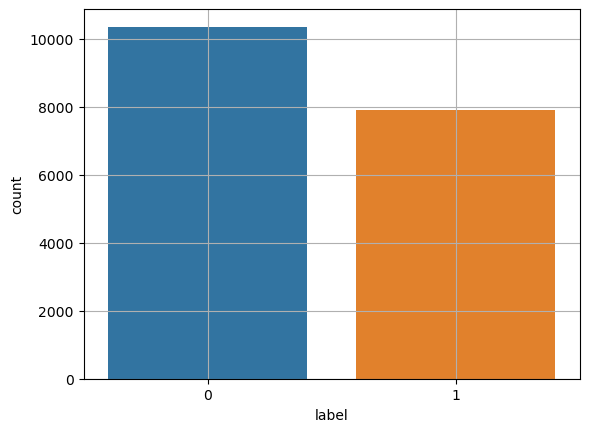

In [289]:
sns.countplot(x=news['label'])
plt.grid(True)
plt.show()

In [290]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [291]:
news.reset_index(drop=True, inplace=True)

In [292]:
news.drop('id',inplace=True,axis=1)

In [293]:
news.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [294]:
def clean_title(lists):
    lists=re.sub('[^a-zA-Z]',' ',lists)
    lists = lists.lower()
    lists = lists.split(' ')
    lists=[ps.stem(word) for word in lists if word not in stopwords.words('english')]
    lists= ' '.join(lists)
    return lists    

In [295]:
corpus=[]
for i in news['title']:
    corpus.append(clean_title(i))    

In [296]:
len(corpus)

18285

In [297]:
corpusdf=pd.DataFrame(corpus)

In [298]:
corpusdf.drop([14102,14251],inplace=True)
corpusdf.reset_index(inplace=True)
corpusdf.loc[14102]
corpusdf.drop('index',axis=1,inplace=True)
corpusdf.loc[14251]

0    obama tri reassur latin america futur donald t...
Name: 14251, dtype: object

In [299]:
corpusdf.to_csv('title_corpus1.csv',index=False)
title_corpus1= pd.read_csv('title_corpus1.csv')
title_corpus1

,0
0,hous dem aid even see comey letter jason chaf...
1,flynn hillari clinton big woman campu brei...
2,truth might get fire
3,civilian kill singl us airstrik identifi
4,iranian woman jail fiction unpublish stori wom...
...,...
18226,rapper trump poster child white supremaci
18227,n f l playoff schedul matchup odd new yor...
18228,maci said receiv takeov approach hudson bay ...
18229,nato russia hold parallel exercis balkan


In [300]:
corpus1=[]
for i in title_corpus1.values:    
    for j in i:
        corpus1.append(j)

In [301]:
len(corpus1)

18231

In [302]:
corpusdf.to_csv('title_corpus2.csv',index=True)
title_corpus2= pd.read_csv('title_corpus2.csv')
title_corpus2.drop('Unnamed: 0',inplace=True,axis=1)
title_corpus2

,0
0,hous dem aid even see comey letter jason chaf...
1,flynn hillari clinton big woman campu brei...
2,truth might get fire
3,civilian kill singl us airstrik identifi
4,iranian woman jail fiction unpublish stori wom...
...,...
18278,rapper trump poster child white supremaci
18279,n f l playoff schedul matchup odd new yor...
18280,maci said receiv takeov approach hudson bay ...
18281,nato russia hold parallel exercis balkan


In [303]:
corpus2=[]
for i in title_corpus2.values:    
    for j in i:
        corpus2.append(j)

In [304]:
len(corpus2)

18283

In [305]:
from sklearn.feature_extraction.text import CountVectorizer

In [306]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [307]:
cv.fit_transform(corpus2).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)